# Job satisfaction

Job satisfaction is a foundamental aspect of modern society, both for personal happiness and companies productiviy. This concept was introduced by Robert Hoppock in 1933 as “The combination of psychological, physiological andenvironmental circumstances that cause a person to truthfully say “I am satisfied with my job”. 

In this notebook we build a Bayesian Network for modeling and predicting job satisfaction. We will build a simple model for capturing and representing a generic job environment, involving several variables: Age, Education, Gender, Department, JobLevel, MonthlyIncome, WorkLifeBalance and JobSatisfaction. 

The [IBM Watson's dataset](https://thebrew.in/hr-analytics-quick-snapshot-ibm-dataset/) is used, which is an artificial dataset. In particular, this [version](https://github.com/shailysaigal/Job-Satisfaction-on-IBM-Watson-dataset) is used. We will slightly modify it, for making it more suitable to our task.

## DATASET

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('IBM_Job_satisfaction.xlsm')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19478 entries, 0 to 19477
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       19478 non-null  int64 
 1   BusinessTravel            19478 non-null  object
 2   DailyRate                 19478 non-null  int64 
 3   Department                19478 non-null  object
 4   DistanceFromHome          19478 non-null  int64 
 5   Education                 19478 non-null  int64 
 6   EnvironmentSatisfaction   19478 non-null  int64 
 7   Gender                    19478 non-null  object
 8   HourlyRate                19478 non-null  int64 
 9   JobInvolvement            19478 non-null  int64 
 10  JobLevel                  19478 non-null  int64 
 11  JobRole                   19478 non-null  object
 12  JobSatisfaction           19478 non-null  int64 
 13  MaritalStatus             19478 non-null  object
 14  MonthlyIncome         

The dataset consists in a collection of responses from $19478$ employees. For each employee, there are several features. we restrict ourselves to the following features: Age, Education, Gender, Department, JobLevel, MonthlyIncome, WorkLifeBalance and JobSatisfaction.

In [4]:
df = df[['Age', 'Department', 'Education', 'Gender', 'JobLevel', 'MonthlyIncome', 'WorkLifeBalance','JobSatisfaction']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19478 entries, 0 to 19477
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              19478 non-null  int64 
 1   Department       19478 non-null  object
 2   Education        19478 non-null  int64 
 3   Gender           19478 non-null  object
 4   JobLevel         19478 non-null  int64 
 5   MonthlyIncome    19478 non-null  int64 
 6   WorkLifeBalance  19478 non-null  int64 
 7   JobSatisfaction  19478 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.2+ MB


### Brief analyisis

In [6]:
df.describe()

,Age,Education,JobLevel,MonthlyIncome,WorkLifeBalance,JobSatisfaction
count,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000
mean,37.524489,2.924274,2.104990,6665.078961,2.769689,2.752849
std,8.860420,1.026008,1.115506,4781.062495,0.700480,1.097875
min,18.000000,1.000000,1.000000,1009.000000,1.000000,1.000000
25%,31.000000,2.000000,1.000000,3038.000000,2.000000,2.000000
50%,36.000000,3.000000,2.000000,5042.000000,3.000000,3.000000
75%,43.000000,4.000000,3.000000,8620.000000,3.000000,4.000000
max,60.000000,5.000000,5.000000,19999.000000,4.000000,4.000000


The numerical features are the following.
- `Age`, with values in $[18,60]$.
- `Education`, with values in $[1,5]$, $5$ for the highest education level.
- `JobLevel`, with values in $[1,5]$, $5$ for the highest job level.
- `MonthlyIncome`, with values in $[1009,19999]$.
- `WorkLifeBalance`, with values in $[0,4]$, $4$ for the highest work-life balance level.
- `JobSatisfaction`, with values in $[0,4]$, $4$ for the highest job-satisfaction level.

There are also two non-numerical features: `Department` and `Gender`.

In [10]:
print('`Department` unique values:', list(df['Department'].unique()))
print('`Gender` unique values:', list(df['Gender'].unique()))

`Department` unique values: ['Research & Development', 'Human Resources', 'Sales']
`Gender` unique values: ['Male', 'Female']


### Visualization

Text(0, 0.5, '#employees')

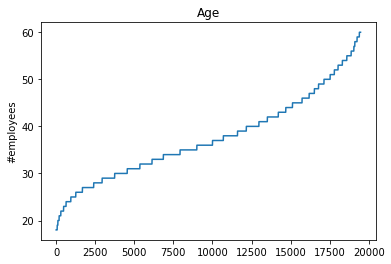

In [29]:
plot = df['Age'].sort_values().plot(use_index=False)
plot.set_title('Age')
plot.set_ylabel('#employees')

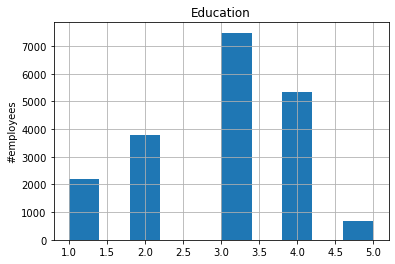

In [30]:
hist = df['Education'].hist()
hist.set_title('Education')
hist.set_ylabel('#employees');

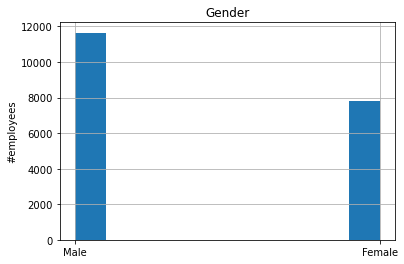

In [31]:
hist = df['Gender'].hist()
hist.set_title('Gender')
hist.set_ylabel('#employees');

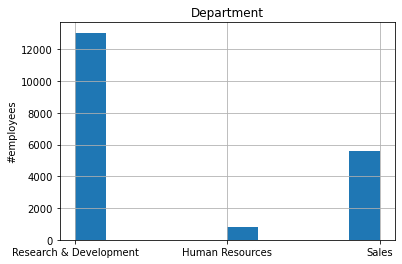

In [25]:
hist = df['Department'].hist()
hist.set_title('Department')
hist.set_ylabel('#employees');

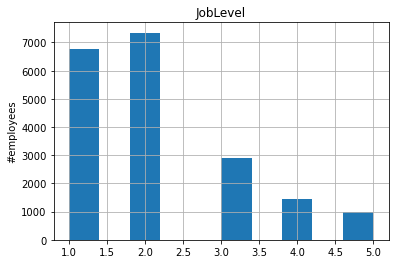

In [32]:
hist = df['JobLevel'].hist()
hist.set_title('JobLevel')
hist.set_ylabel('#employees');

Text(0, 0.5, '#employees')

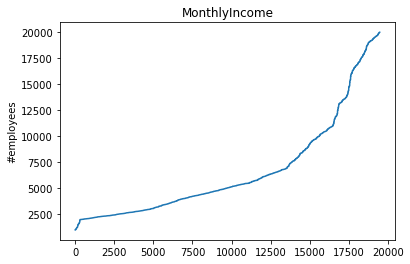

In [28]:
plot = df['MonthlyIncome'].sort_values().plot(use_index=False)
plot.set_title('MonthlyIncome')
plot.set_ylabel('#employees')

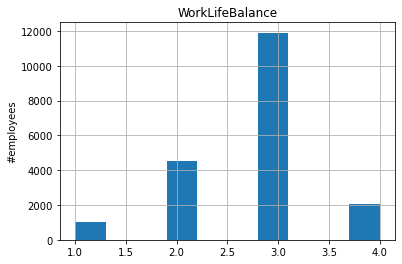

In [33]:
hist = df['WorkLifeBalance'].hist()
hist.set_title('WorkLifeBalance')
hist.set_ylabel('#employees');

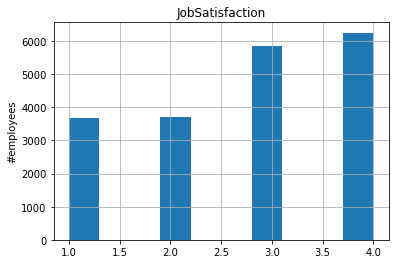

In [34]:
hist = df['JobSatisfaction'].hist()
hist.set_title('JobSatisfaction')
hist.set_ylabel('#employees');

## PREPROCESSING
Several preprocessing activities must be carried out before building our model.

### Dealing with non-numerical features
We map the non-numerical features, i.e. `Department` and `Gender,` into numerical values.

In [35]:
dept_dict = {d:i for i,d in enumerate(df['Department'].unique()[[1, 0, 2]])}
dept_dict_inv = {i:d for d,i in dept_dict.items()}
dept_dict

{'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}

In [36]:
df['Department'] = df['Department'].map(dept_dict)

In [37]:
gender_dict = {g:i for i,g in enumerate(df['Gender'].unique()[[1,0]])}
gender_dict_inv = {i:g for g,i in dept_dict.items()}
gender_dict

{'Female': 0, 'Male': 1}

In [38]:
df['Gender'] = df['Gender'].map(gender_dict)

### Dealing with continuous features
We discretize the continuous features, i.e. `Age` and `MonthlyIncome`. We discretize each feature into three balanced levels.

First of all, let's do that for `Age`.

In [39]:
# Computing the levels for dividing `Age` into three balanced intervals
q1_age, q2_age = df['Age'].quantile([0.3333,0.6666]).astype(int).values
q1_age, q2_age

(33, 41)

In [40]:
(df['Age']<=q1_age).sum(), (np.logical_and(df['Age']>q1_age,df['Age']<=q2_age)).sum(), (df['Age']>q2_age).sum()

(6856, 6655, 5967)

In [42]:
min_age = df['Age'].min()
max_age = df['Age'].max()

def transform_age(age):
    if age<=q1_age:
        return f'{min_age}-{q1_age}'
    elif age>q1_age and age<=q2_age:
        return f'{q1_age}-{q2_age}'
    elif age>q2_age:
        return f'{q2_age}-{max_age}'
    
df['Age'] = df['Age'].map(transform_age)

In [47]:
print('Three levels of `Age`:', sorted(list(df['Age'].unique())))

Three levels of `Age`: ['41-60', '18-33', '33-41']


In [48]:
# Now we map the three levels into numbers
age_dict = {a:i for i,a in enumerate(sorted(df['Age'].unique()))}
age_dict_inv = {i:a for a,i in age_dict.items()}
age_dict

{'18-33': 0, '33-41': 1, '41-60': 2}

In [49]:
df['Age'] = df['Age'].map(age_dict)

In [52]:
print('Three levels of `Age`:', sorted(list(df['Age'].unique())))

Three levels of `Age`: [0, 1, 2]


Let's now do that for `MonthlyIncome`.

In [50]:
# Computing the levels for dividing `MonthlyIncome` into three balanced intervals
q1_inc, q2_inc = df['MonthlyIncome'].quantile([0.3333,0.6666]).astype(int).values
q1_inc, q2_inc

(3812, 6632)

In [54]:
(df['MonthlyIncome']<=q1_inc).sum(), (np.logical_and(df['MonthlyIncome']>q1_inc,df['MonthlyIncome']<=q2_inc)).sum(), (df['MonthlyIncome']>q2_inc).sum()

(6499, 6496, 6483)

In [55]:
min_inc = df['MonthlyIncome'].min()
max_inc = df['MonthlyIncome'].max()

def transform_income(income):
    if income<=q1_inc:
        return f'{min_inc}-{q1_inc}'
    elif income>q1_inc and income<=q2_inc:
        return f'{q1_inc}-{q2_inc}'
    elif income>q2_inc:
        return f'{q2_inc}-{max_inc}'
    
df['MonthlyIncome'] = df['MonthlyIncome'].map(transform_income)

In [56]:
print('Three levels of `MonthlyIncome`:', sorted(list(df['MonthlyIncome'].unique())))

Three levels of `MonthlyIncome`: ['1009-3812', '3812-6632', '6632-19999']


In [57]:
# Now we map the three levels into numbers
income_dict = {inc:i for i,inc in enumerate(sorted(df['MonthlyIncome'].unique(), key=lambda inc: int(inc.split('-')[0])))}
income_dict_inv = {inc:a for a,inc in income_dict.items()}
income_dict

{'1009-3812': 0, '3812-6632': 1, '6632-19999': 2}

In [58]:
df['MonthlyIncome'] = df['MonthlyIncome'].map(income_dict)

In [59]:
print('Three levels of `MonthlyIncome`:', sorted(list(df['MonthlyIncome'].unique())))

Three levels of `MonthlyIncome`: [0, 1, 2]


### Reducing the number of levels
We take the already discretized variables, i.e. `Education`, `JobLevel`, `WorkLifeBalance`, `JobSatisfaction`, and we reduce the number of levels into three balanced levels.

`Education`: levels $1, 2, ..., 5$. We reduce that into three balanced levels $0, 1, 2$.

In [60]:
(df['Education']<=2).sum(), (df['Education']==3).sum(), (df['Education']>3).sum()

(5975, 7479, 6024)

In [61]:
def transform_education(e):
    if e>=1 and e<=2:
        return 0
    elif e==3:
        return 1
    else: 
        return 2

df['Education'] = df['Education'].map(transform_education)

`JobLevel`: levels $1,2,...,5$. We reduce that into three balanced levels $0,1,2$.

In [62]:
(df['JobLevel']==1).sum(), (df['JobLevel']==2).sum(), (df['JobLevel']>2).sum()

(6766, 7347, 5365)

In [63]:
def transform_jobLevel(l):
    if l==1:
        return 0
    elif l==2:
        return 1
    else: 
        return 2

df['JobLevel'] = df['JobLevel'].map(transform_jobLevel)

`WorkLifeBalance`: levels $1,2,3,4$. We reduce that into three levels $0,1,2$.

In [64]:
def transform_workLifeBalance(b):
    if b>=1 and b<=2:
        return 0
    elif b>=3 and b<=4:
        return 1

df['WorkLifeBalance'] = df['WorkLifeBalance'].map(transform_workLifeBalance)

`JobSatisfaction`: levels $1,2,3,4$. We reduce that into three levels $0,1,2$.

In [65]:
def transform_jobSatisfaction(s):
    if s>=1 and s<=2:
        return 0
    elif s>=3 and s<=4:
        return 1

df['JobSatisfaction'] = df['JobSatisfaction'].map(transform_jobSatisfaction)

## ANALYSIS
Eight discretized and balanced features.

In [66]:
df.describe()

,Age,Department,Education,Gender,JobLevel,MonthlyIncome,WorkLifeBalance,JobSatisfaction
count,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000
mean,0.954359,1.246021,1.002516,0.597854,0.928073,0.999179,0.716295,0.620700
std,0.810113,0.518838,0.784891,0.490344,0.785916,0.816412,0.450807,0.485225
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
max,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000


Let's explore the relationships between them.

### Heatmap

<AxesSubplot:>

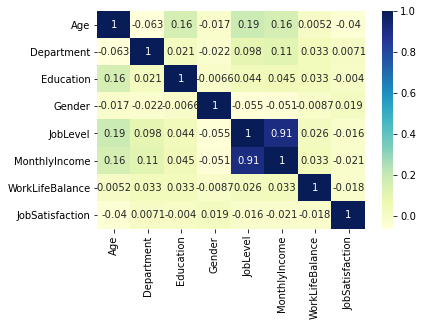

In [70]:
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

- String correlation between `JobLevel` and `MonthlyIncome`.
- Correlation between `Age` and `JobLevel` and `Education`.
- Between all the remaining features, no relationship. No relationships `Gender`-`JobLevel`, `Education`-`JobLevel`, `MonthlyIncome`-`JobeSatisfaction`, `WorkLifeBalance`-`JobSatisfactio`, ... . Quite unrealistic.

### Pairplot

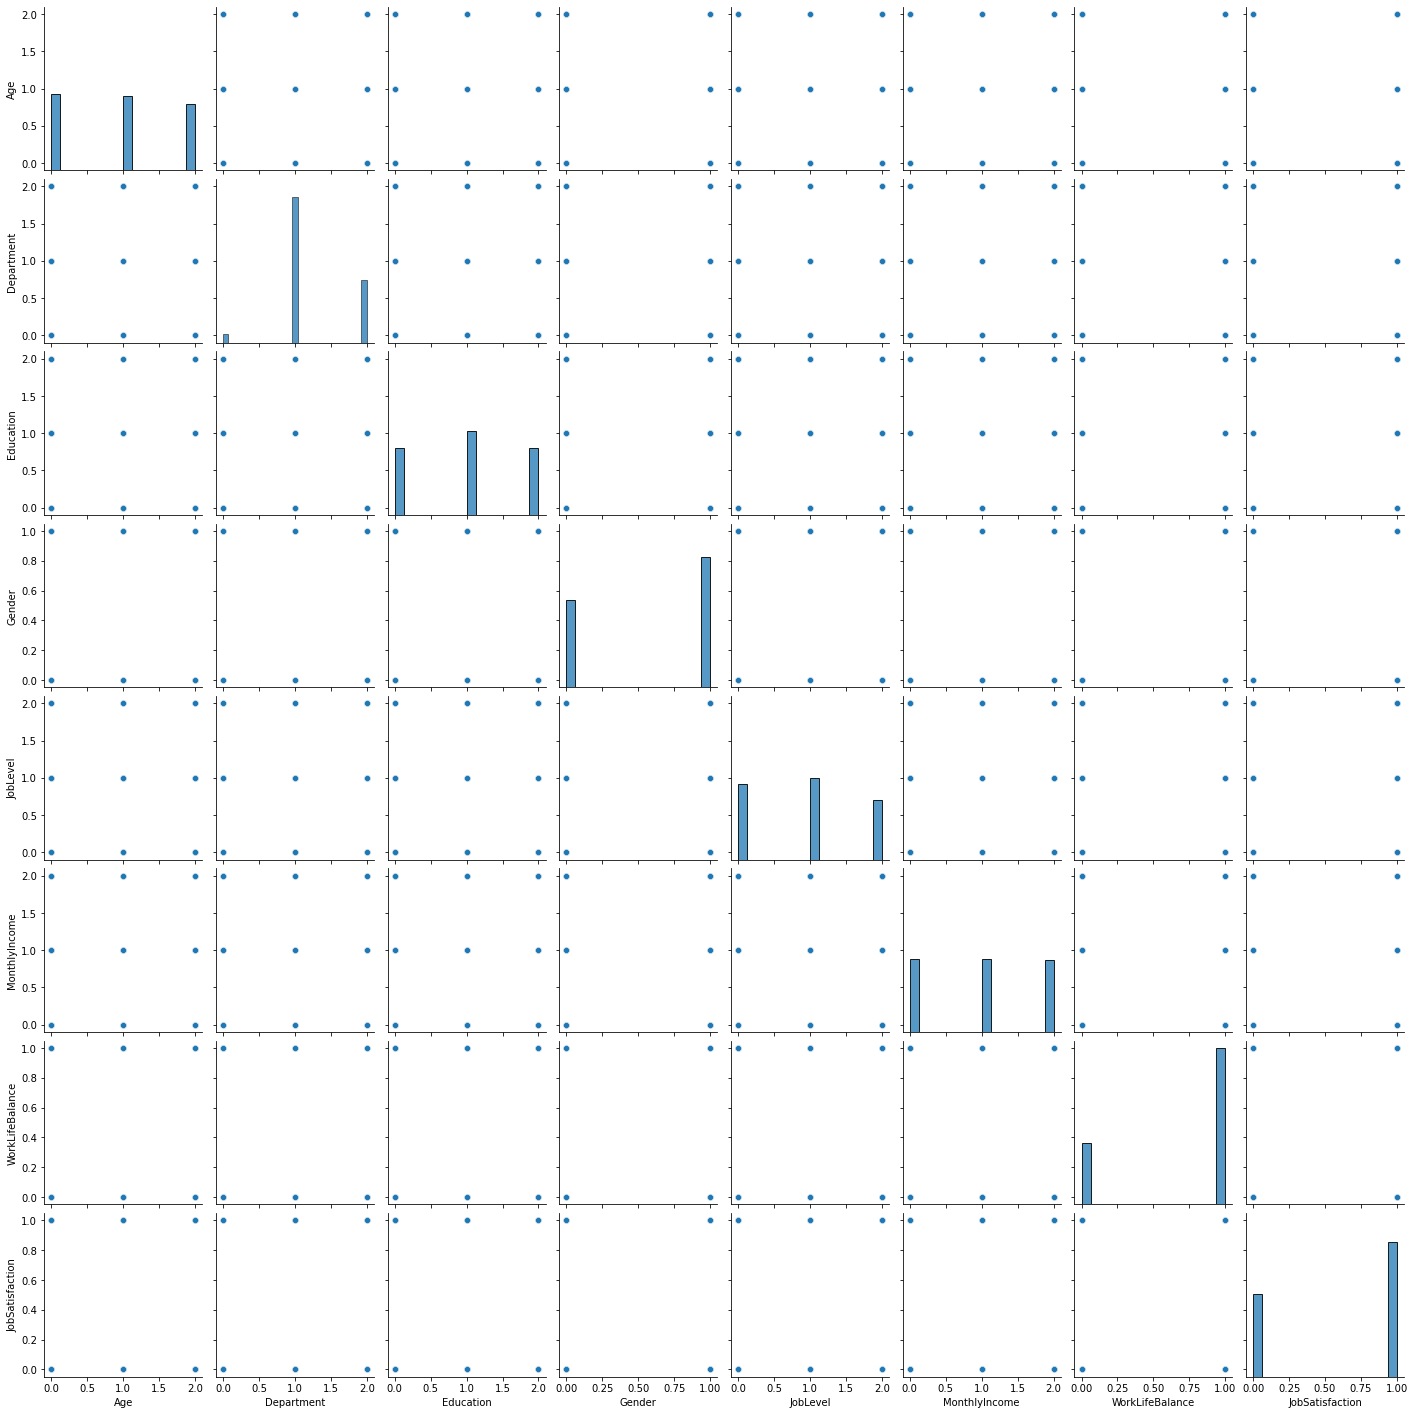

In [71]:
import seaborn as sns
sns.pairplot(df);

### Boxplots
Apart from `JobLevel`-`MonthlyIncome`, `Age`-`JobLevel` and `Age`-`Education`, no other relationships.

<AxesSubplot:xlabel='JobLevel', ylabel='MonthlyIncome'>

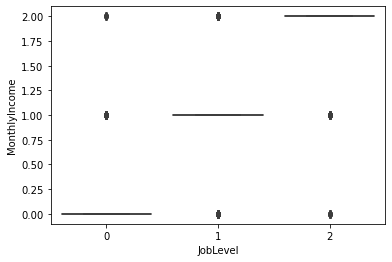

In [72]:
sns.boxplot(x='JobLevel', y='MonthlyIncome', data=df)

<AxesSubplot:xlabel='Age', ylabel='JobLevel'>

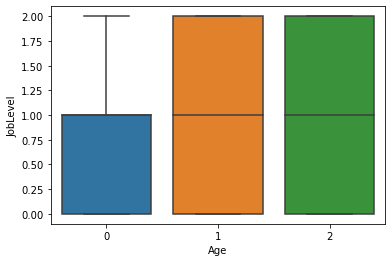

In [73]:
sns.boxplot(x='Age', y='JobLevel', data=df)

<AxesSubplot:xlabel='Age', ylabel='Education'>

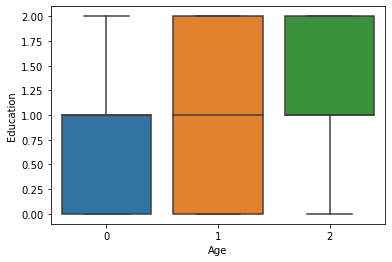

In [75]:
sns.boxplot(x='Age', y='Education', data=df)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobSatisfaction'>

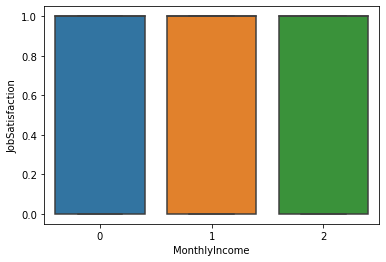

In [76]:
sns.boxplot(x='MonthlyIncome', y='JobSatisfaction', data=df)

<AxesSubplot:xlabel='Gender', ylabel='JobLevel'>

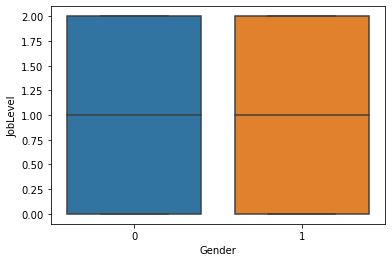

In [77]:
sns.boxplot(x='Gender', y='JobLevel', data=df)

## ADDING BIAS
As is has just been showed, there are only few relationships in our dataset. Only relationships `JobLevel`-`MonthlyIncome`, `Age`-`JobLevel` and `Age`-`Education`.

This is quite unrealistic, and it is not suitable for our purposes. Therefore, we slightly modify the dataset, by adding some bias into it. 

In [78]:
from utils import add_bias

In [79]:
help(add_bias)

Help on function add_bias in module utils:

add_bias(data, evidence, variable, positive=True, amount=0.2)
    Adds some bias in the given dataset, for injecting a certain relationship.
    
    The relationship of interest is the relationship `evidence`->`variable`: `evidence` is the antecedent and `variable` is
    the consequent. 
    Intuitively, this relationship is enforced by slightly modifying some values of `variable` s.t. a bigger correlation 
    between the variables emrges. 
    
    Parameters
    ----------
    data : pd.DataFrame
        Dataset into which injecting the bias
    evidence : str
        Antecedent feature
    variable : str
        Consequent feature
    positive : bool, optional
        Positive or negative influence of the antecedent on the consequent, by default True.
        Positive influence means positive correlation: the bigger `evidence`, the bigger `variable`.
        Negative influence means negative correlation: the smaller `evidence`, the bigg